In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load dataset
train_df = pd.read_csv('data/train.csv', delimiter=",")

In [54]:
# balance xy into even Survived/Died
g = xy.groupby('Survived')
xy = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))

0.5

<BarContainer object of 3 artists>

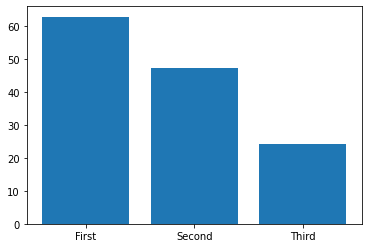

In [23]:
# Class x Survival_rate 
ys = np.array(xy["Survived"])
xs = np.array(xy["Pclass"])

totals = np.zeros(3)
y = np.zeros(3)
x = np.arange(3)

for i in range(len(xs)):
    totals[xs[i]-1] += 1
    if ys[i] == 1:
        y[xs[i]-1] += 1
        
y = y / totals * 100.0

labels = ['First', 'Second', 'Third']

plt.bar(x, y, tick_label=labels)

<BarContainer object of 2 artists>

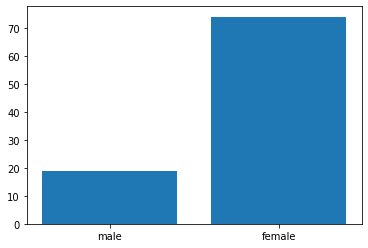

In [38]:
# Sex x Survival_rate
ys = np.array(xy["Survived"])
xs = np.array(xy["Sex"])

sex = np.arange(2)
total = np.zeros(2)
survived = np.zeros(2)
y = np.zeros(2)
labels = ["male", "female"]

for i, x in enumerate(xs):
    if x == labels[0]:
        total[0] += 1
        if ys[i] == 1:
            survived[0] += 1
    elif x == labels[1]:
        total[1] += 1
        if ys[i] == 1:
            survived[1] += 1
    else:
        print('Erroneous sex:', x)
        
survived = survived / total * 100


plt.bar(sex, survived, tick_label=labels)

<BarContainer object of 1 artists>

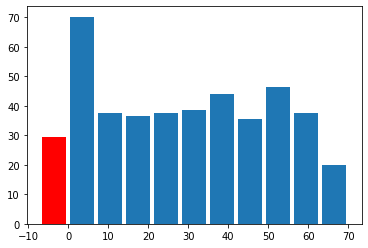

In [94]:
# Age x Survival_rate
ys = np.array(xy["Survived"])
xs = np.array(xy["Age"])

bin_width = 7
max_age = 70
y = np.zeros(int(max_age/bin_width))
totals = np.zeros(int(max_age/bin_width))

nan_total = 0
nan_surv = 0

for i, age in enumerate(xs):
    if not np.isnan(age):
        if age >= max_age:
            age = max_age-1
        totals[int(age)//bin_width] += 1
        if ys[i] == 1:
            y[int((age)//bin_width)] += 1
    else:
        nan_total += 1
        if ys[i] == 1:
            nan_surv += 1
y = y / totals * 100

x = np.arange(0, max_age, bin_width) + bin_width/2

plt.bar(x, y, width=bin_width-1)
plt.bar([-bin_width/2], [nan_surv/nan_total * 100], color='r', width=bin_width-1)
#plt.bar(x, totals, width=bin_width-1)


[0. 0. 0.]


<BarContainer object of 3 artists>

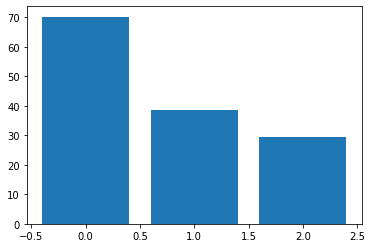

In [24]:
# {under_7, 7_and_over, unknown} x Survival
ys = np.array(xy["Survived"])
xs = np.array(xy["Age"])

x = np.arange(3)
y = np.zeros(3)
totals = np.zeros(3)
print(y)

for i, age in enumerate(xs):
    index = -1
    if np.isnan(age):
        index = 2
    elif age >= 7:
        index = 1
    elif age < 7:
        index = 0
    else:
        print("could not classify age value")
    totals[index] += 1
    if ys[i] == 1:
        y[index] += 1
    
y = y / totals * 100.0

plt.bar(x,y)

    

<BarContainer object of 2 artists>

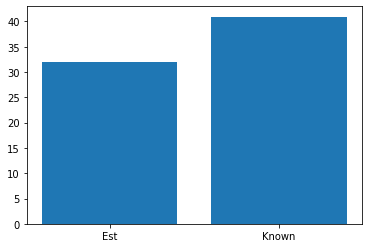

In [104]:
# Age_is_estimated x Survival_rate
ys = np.array(xy["Survived"])
xs = np.array(xy["Age"])

bin_width = 4
max_age = 96

y = np.zeros(2)
totals = np.zeros(2)
for i, age in enumerate(xs):
    if not np.isnan(age):
        if age % 1 == 0:
            totals[1] += 1
            if ys[i] == 1:
                y[1] += 1
        else:
            totals[0] += 1
            if ys[i] == 1:
                y[0] += 1
y = y / totals * 100

x = np.arange(2)

plt.bar(x, y, tick_label=['Est', 'Known'])

C:\Users\joegr\AppData\Local\Temp/ipykernel_17916/1114444153.py:11: RuntimeWarning: invalid value encountered in true_divide
  y = y / totals * 100


<BarContainer object of 9 artists>

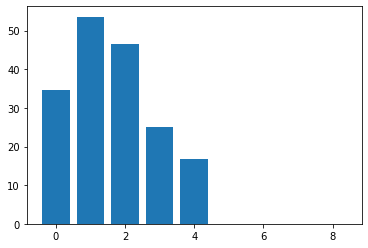

In [102]:
# sibsb x Survival rate
ys = np.array(xy["Survived"])
xs = np.array(xy["SibSp"])

y = np.zeros(9)
totals = np.zeros(9)
for i, sibsp in enumerate(xs):
    totals[sibsp] += 1
    if ys[i] == 1:
        y[sibsp] += 1
y = y / totals * 100

x = np.arange(9)

plt.bar(x, y)

<BarContainer object of 7 artists>

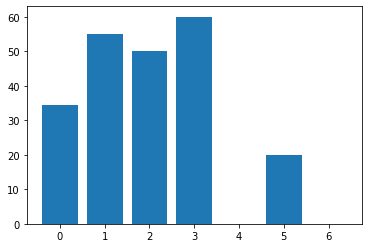

In [109]:
# sibsb x Survival rate
ys = np.array(xy["Survived"])
xs = np.array(xy["Parch"])

y = np.zeros(7)
totals = np.zeros(7)
for i, parch in enumerate(xs):
    totals[parch] += 1
    if ys[i] == 1:
        y[parch] += 1
y = y / totals * 100

x = np.arange(7)

plt.bar(x, y)

In [107]:
# sibsb x Survival rate
ys = np.array(xy["Survived"])
xs = np.array(xy["Parch"])

y = np.zeros(7)
totals = np.zeros(7)
for i, parch in enumerate(xs):
    totals[parch] += 1
    if ys[i] == 1:
        y[parch] += 1
y = y / totals * 100

x = np.arange(7)

plt.bar(x, y)

6

C:\Users\joegr\AppData\Local\Temp/ipykernel_17916/1378999772.py:18: RuntimeWarning: invalid value encountered in true_divide
  y = y / totals * 100


<BarContainer object of 60 artists>

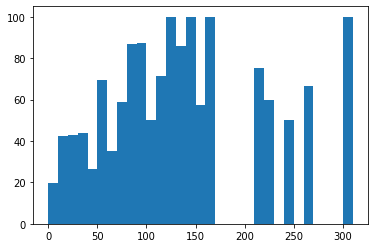

In [137]:
# Fare x Survival_rate
ys = np.array(xy["Survived"])
xs = np.array(xy["Fare"])

bin_width = 10
max_fare = 600
thresh = 300

y = np.zeros(int(max_fare/bin_width))
totals = np.zeros(int(max_fare/bin_width))
for i, fare in enumerate(xs):
    if not np.isnan(fare):
        if fare > thresh:
            fare = thresh
        totals[int(fare)//bin_width] += 1
        if ys[i] == 1:
            y[int((fare)//bin_width)] += 1
y = y / totals * 100

x = np.arange(0, max_fare, bin_width) + bin_width/2

plt.bar(x, y, width=bin_width)

Skipping a cabin


<BarContainer object of 8 artists>

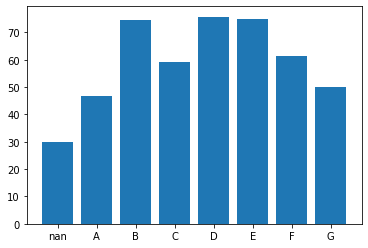

In [195]:
# Fare x Survival_rate
new_xy = xy.loc[:,["Survived", "Cabin"]]
nans_xy = xy[xy["Cabin"].isna()]
new_xy = new_xy.dropna()
ys = np.array(new_xy["Survived"])
xs = np.array(new_xy["Cabin"])

for i in range(len(xs)):
    xs[i] = xs[i][0]
    
classes = np.arange(8)    
survived_by_class = np.zeros(8)
totals_by_class = np.zeros(8)


for i, cabin in enumerate(xs):
    cabin_class = ord(cabin) - 64
    if cabin_class > 7:
        print("Skipping a cabin")
        continue
    totals_by_class[cabin_class] += 1
    if ys[i] == 1:
        survived_by_class[cabin_class] += 1

totals_by_class[0] = len(nans_xy)
survived_by_class[0] = np.array(nans_xy["Survived"]).sum()

survived_by_class = survived_by_class  / totals_by_class  * 100 

labels = ['nan', 'A', 'B', 'C', 'D', 'E', 'F', 'G']

plt.bar(classes, survived_by_class, tick_label = labels)

<BarContainer object of 3 artists>

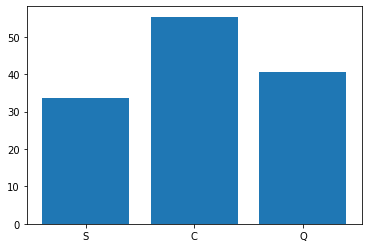

In [179]:
# Fare x Survival_rate
ys = np.array(xy["Survived"])
xs = np.array(xy["Embarked"])

def embarked_to_num(emb):
    if emb == 'S':
        return 0
    elif emb == 'C':
        return 1
    elif emb == 'Q':
        return 2
    else:
        return -1
    
classes = np.arange(3)    
survived_by_class = np.zeros(3)
totals_by_class = np.zeros(3)

for i, embarked in enumerate(xs):
    class_id = embarked_to_num(embarked)
    totals_by_class[class_id] += 1
    if ys[i] == 1:
        survived_by_class[class_id] += 1

survived_by_class = survived_by_class / totals_by_class * 100

labels = ['S', 'C', 'Q']

plt.bar(classes, survived_by_class, tick_label=labels)

<BarContainer object of 9 artists>

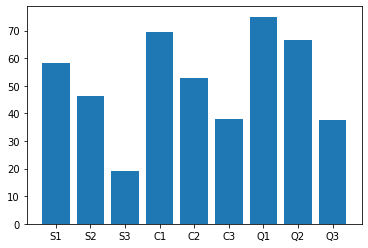

In [207]:
# Embarked&Class x Survival
# Fare x Survival_rate
ys = np.array(xy["Survived"])
xs = np.array(xy[["Embarked", "Pclass"]])

def embarked_to_num(emb):
    if emb == 'S':
        return 0
    elif emb == 'C':
        return 1
    elif emb == 'Q':
        return 2
    else:
        return -1
    
classes = np.arange(9)    
survived_by_class = np.zeros(9)
totals_by_class = np.zeros(9)

for i, embcla in enumerate(xs):
    #class_id = embarked_to_num(embcla[0]) + (embcla[1]-1)*3 # grouped by Pclass
    class_id = embarked_to_num(embcla[0]) *3 + (embcla[1]-1) # grouped by Embarked
    
    totals_by_class[class_id] += 1
    if ys[i] == 1:
        survived_by_class[class_id] += 1

survived_by_class = survived_by_class / totals_by_class * 100

labels1 = ['S1', 'S2', 'S3', 'C1', 'C2', 'C3', 'Q1', 'Q2', 'Q3']
labels2 = ['S1', 'C1', 'Q1', 'S2', 'C2', 'Q2', 'S3', 'C3', 'Q3']

plt.bar(classes, survived_by_class, tick_label=labels1)

[['male' 3]
 ['female' 1]
 ['female' 3]
 ...
 ['female' 3]
 ['male' 1]
 ['male' 3]]
[45. 17. 47. 91. 70. 72.]
[122. 108. 347.  94.  76. 144.]


<BarContainer object of 6 artists>

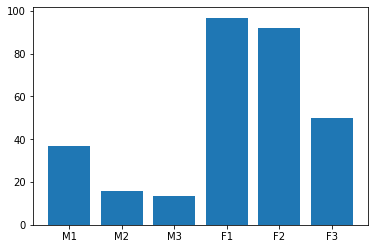

In [227]:
# Sex&Class x Survival
# Fare x Survival_rate
ys = np.array(xy["Survived"])
xs = np.array(xy[["Sex", "Pclass"]])
print(xs)

def sex_to_num(sex):
    if sex == 'male':
        return 0
    elif sex == 'female':
        return 1
    else:
        return -1
    
classes = np.arange(6)    
survived_by_class = np.zeros(6)
totals_by_class = np.zeros(6)

for i, sex_class in enumerate(xs):
    #class_id = sex_to_num(sex_class[0]) + (sex_class[1]-1)*2 # grouped by Pclass
    class_id = (sex_to_num(sex_class[0])*3) + (sex_class[1]-1) # grouped by Sex
    
    totals_by_class[class_id] += 1
    if ys[i] == 1:
        survived_by_class[class_id] += 1
print(survived_by_class)
print(totals_by_class)

survived_by_class = survived_by_class / totals_by_class * 100

labels1 = ['M1', 'M2', 'M3', 'F1', 'F2', 'F3']
labels2 = ['M1', 'F1', 'M2', 'F2', 'M3', 'F3']

plt.bar(classes, survived_by_class, tick_label=labels1)